In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
#reading the dataset
churn_data = pd.read_csv("churn_dataset.csv")

In [4]:
# structure of dataset (total rows and columns) with their datatypes
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
#getting idea of values in the dataset
churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#count number of null values in every column of df

churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#check empty strings in string columns and deal with them
s = churn_data.select_dtypes(include=[object]) 
for col in s:
    print((s[col].values == ' ').sum(),col)

0 customerID
0 gender
0 Partner
0 Dependents
0 PhoneService
0 MultipleLines
0 InternetService
0 OnlineSecurity
0 OnlineBackup
0 DeviceProtection
0 TechSupport
0 StreamingTV
0 StreamingMovies
0 Contract
0 PaperlessBilling
0 PaymentMethod
11 TotalCharges
0 Churn


We find in TotalCharges there are 11 empty string rows

In [8]:
#percentage of null values in that column
perc = (churn_data['TotalCharges'].values == ' ').sum()/churn_data.shape[0]
print(perc)

0.001561834445548772


since the percentage of empty rows is very less we can remove them completely and not replace them.

In [9]:
s = churn_data[churn_data['TotalCharges'] == ' '].index
churn_data.drop(s , inplace=True)

Exploratory Data Analysis

In [10]:

#First we observe our numerical columns, and the variation of values in them. 
s = churn_data.select_dtypes(include=[np.int64,np.float64]) 

for col in s:
    print((s[col].unique(),col))



(array([0, 1], dtype=int64), 'SeniorCitizen')
(array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64), 'tenure')
(array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ]), 'MonthlyCharges')


As we can see, SeniorCitizen is a column with only  0 and 1 as its values so the person is either a Senior Citizen indicated by 1 or not indicated by 0.

hence we convert that column to categorical column.

In [11]:
churn_data['SeniorCitizen'] = pd.Categorical(churn_data.SeniorCitizen)
churn_data.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

Totalcharges should be numeric

In [12]:

churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

First we need to encode categorical column churn to numerical to get correlation

In [13]:


cleanup_nums = {"Churn":     {"No": 0, "Yes": 1}}
churn_data.replace(cleanup_nums, inplace=True)
#getting correlations

churn_data.corr()



,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.354049,0.192858,-0.199484,1.000000


As we can see, there is positive correlation between monthly charges and churn- meaning the more the monthly value charged to customer,more is the prob of customer leaving.
Negative correlation between tenure and customer churn indicates that more the tenure, less the chance of customer leaving.

As totalCharges and monthly charges are correlated and also totalCharges and tenure are correlated. Hence we remove TotalCharges. 

Also removing customerId as no significance of this column.

In [ ]:
churn_data = churn_data.drop(['TotalCharges', 'customerID'], axis = 1) 

Lets do more EDA on our data to make it fit for modelling.


In [15]:
#first lets analyze the values of our categorical columns.
s = churn_data.select_dtypes(include=[object]) 
for col in s:
    print((s[col].unique(),col))


(array(['Female', 'Male'], dtype=object), 'gender')
(array(['Yes', 'No'], dtype=object), 'Partner')
(array(['No', 'Yes'], dtype=object), 'Dependents')
(array(['No', 'Yes'], dtype=object), 'PhoneService')
(array(['No phone service', 'No', 'Yes'], dtype=object), 'MultipleLines')
(array(['DSL', 'Fiber optic', 'No'], dtype=object), 'InternetService')
(array(['No', 'Yes', 'No internet service'], dtype=object), 'OnlineSecurity')
(array(['Yes', 'No', 'No internet service'], dtype=object), 'OnlineBackup')
(array(['No', 'Yes', 'No internet service'], dtype=object), 'DeviceProtection')
(array(['No', 'Yes', 'No internet service'], dtype=object), 'TechSupport')
(array(['No', 'Yes', 'No internet service'], dtype=object), 'StreamingTV')
(array(['No', 'Yes', 'No internet service'], dtype=object), 'StreamingMovies')
(array(['Month-to-month', 'One year', 'Two year'], dtype=object), 'Contract')
(array(['Yes', 'No'], dtype=object), 'PaperlessBilling')
(array(['Electronic check', 'Mailed check', 'Bank tra

Here no internet service means we do not have internet service and it is same as No. Same goes for MultipleLines column. So encoding that to No.

In [16]:

cleanup_nums = {"OnlineSecurity":     {"No internet service": "No"},
"OnlineBackup":     {"No internet service": "No"},
"DeviceProtection":     {"No internet service": "No"},
"TechSupport":     {"No internet service": "No"},
"StreamingTV":     {"No internet service": "No"},
"StreamingMovies":     {"No internet service": "No"},
"MultipleLines":     {"No phone service": "No"}}
churn_data.replace(cleanup_nums, inplace=True)


In [17]:
#Let us encode all our categorical variables
mylist = list(churn_data.select_dtypes(include=['object']).columns)
churn_data = pd.get_dummies(churn_data,columns=mylist,drop_first=True)

In [ ]:
churn_data.head()

In [ ]:
churn_data.info()

In [18]:
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
y=churn_data['Churn']
X = churn_data.drop(['Churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


**An external estimator that assigns weights to features (e.g., the coefficients of the logistic model), 
recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 
First, the estimator is trained on the initial set of features and the importance of each feature is obtained either
through a coef_ attribute or through a feature_importances_ attribute. 
Then, the least important features are pruned from current set of features.This is repeated until the optimum number of features is reached.
Here I have added cross validation too to know optimal number of features over the folds.**

C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Optimal number of features : 22


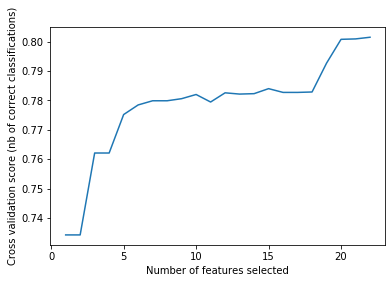

In [19]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Create the RFE object and compute a cross-validated score.
logreg = LogisticRegression()
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)
n_features_ = 22
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

From above plot as features are added cross validation increases. 
Hence all features are kept with this method of recursive feature elimination. Its implicitly a backward elimination technique.


In [23]:
#Analyze values of our dataset
churn_data['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

As our dataset is imbalaced, meaning more 0's than 1's, we make it more balanced, while training.

In [24]:
#Performing Logistic regression first on binomial output variable churn 
from sklearn.linear_model import LogisticRegression

log_fit = LogisticRegression(class_weight='balanced')
s = log_fit.fit(X_train,y_train)

C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
#predicting on test data
predictions=log_fit.predict(X_test)

In [26]:
#Getting accuracy measures
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1 Score:",metrics.f1_score(y_test, predictions))


Accuracy: 0.7507109004739336
Precision: 0.5024570024570024
Recall: 0.7716981132075472
F1 Score: 0.6086309523809524


As we can see logistic regression gives a good recall of 77% on this dataset which is good and hence this classifier is good.
For our business problem of churning, there should be less false negatives- that is model predicted they would not churn but actually they churned. Hence recall is our measure to improve so that there be less false negative value.

In [27]:
#Lets work with ensemble method- Random Forest and thus introduce combination of learners to get a strong learner.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, class_weight='balanced')

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [29]:
predictions = rfc.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1 Score:",metrics.f1_score(y_test, predictions))

Accuracy: 0.795260663507109
Precision: 0.6172248803827751
Recall: 0.4867924528301887
F1 Score: 0.5443037974683546


Although random forest gives better accuracy than logistic regression, it gives a pretty bad measure of recall which for our business problem is bad.

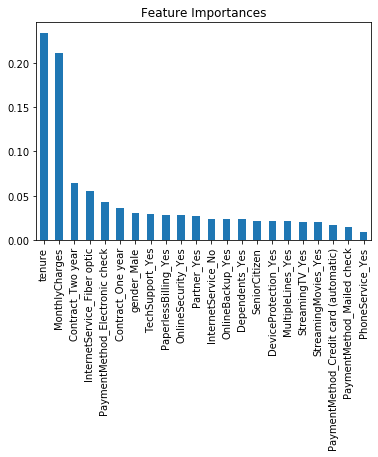

In [31]:
#Lets get important features of our model.
coef_rf = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending=False)
coef_rf.plot(kind='bar', title='Feature Importances')

We find from above that tenure, monthlycharges,internet service, payment method and Contract are most important in predicting churning of customers.

Lets hypertune random forest to see if we can increase recall and thus improve our model. 


In [32]:

from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 8)]
# Criteria to consider number of features at every split
max_features = ['auto', 'sqrt']
# The max number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 10, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Random method for selection of samples out of all attributes provided
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid


{'n_estimators': [20, 45, 71, 97, 122, 148, 174, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [4, 5, 6, 7, 8, 10, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

The benefit of a random search is that we are not trying every combination, 
but selecting at random to sample a wide range of values.

In [33]:
#Lets get the best parameters
rfc_model = RandomForestClassifier()
rf_final = RandomizedSearchCV(estimator = rfc_model, param_distributions = random_grid, 
                                         n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
rf_final.fit(X_train, y_train)
rf_final.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.0s finished


{'n_estimators': 45,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

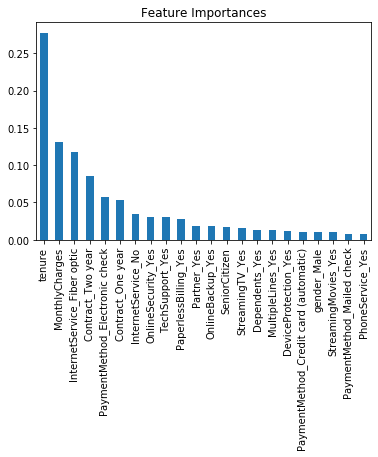

In [34]:
#Applying best parameters to again fit and getting feature importance and accuracy
model_rf = RandomForestClassifier(n_estimators=45,min_samples_split=5,max_depth=8,bootstrap=True,
                                  max_features='auto',min_samples_leaf=1,n_jobs=-1)
model_rf.fit(X_train,y_train)
predictions = model_rf.predict(X_test)
coef_rf = pd.Series(model_rf.feature_importances_, X.columns).sort_values(ascending=False)
coef_rf.plot(kind='bar', title='Feature Importances')

In [37]:
#Accuracy after tuning
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1Score:",metrics.f1_score(y_test, predictions))

0.8099526066350711
Accuracy: 0.8099526066350711
Precision: 0.6747967479674797
Recall: 0.469811320754717
F1Score: 0.5539488320355951


There is no much difference even after tuning on random parameters. Hence we chose Logistic Regression as our classifier which gives a good recall.
Although all features are selected as by RFE with cross validation which is a backward elimination technique and eliminates features based on their importance or coefficient values,
but most important features turn out to be tenure, MonthlyCharges, InternetService,Contract and PaymentMethod and we should focus on these to reduce churning.